In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D  #2Dfigure (word vector:1D)
from keras.utils import np_utils #Transfer numbers to 1D vectors ex: 1>>[0,1,0,0,0,0,0,0,0]
from keras.optimizers import Adam, SGD #maybe SGD, GD, Adadelta .etc 
import keras.callbacks

Using TensorFlow backend.


In [3]:
(x0_train, y0_train), (x0_test, y0_test) = mnist.load_data()
#Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

In [4]:
print(
"Scale of x0_train:",x0_train.shape,"\n", 
"Scale of y0_train:",y0_train.shape,"\n",
"Scale of x0_test:",x0_test.shape,"\n",     
"Scale of y0_test:",y0_test.shape,"\n",
) #Check the dimensions of your input datasets.

Scale of x0_train: (60000, 28, 28) 
 Scale of y0_train: (60000,) 
 Scale of x0_test: (10000, 28, 28) 
 Scale of y0_test: (10000,) 



In [5]:
x_train = x0_train.reshape(60000, 28, 28, 1)
x_test = x0_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train = x_train / 255
x_test = x_test / 255

In [6]:
y_train = np_utils.to_categorical(y0_train, 10)
y_test = np_utils.to_categorical(y0_test, 10)

In [7]:
print(
"Scale of x_train:",x_train.shape,"\n", 
"Scale of y_train:",y_train.shape,"\n",
"Scale of x_test:",x_test.shape,"\n",     
"Scale of y_test:",y_test.shape,"\n",
)  #Check the dimensions of your training datasets.

Scale of x_train: (60000, 28, 28, 1) 
 Scale of y_train: (60000, 10) 
 Scale of x_test: (10000, 28, 28, 1) 
 Scale of y_test: (10000, 10) 



In [8]:
print(y0_test[2])

1


## Model

In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=100, input_shape=(28,28,1)))
model.add(Flatten())
model.add(Activation('relu'))

In [11]:
model.add(Dense(units=100))
model.add(Activation('relu'))

In [12]:
model.add(Dense(units=10))
model.add(Activation('softmax'))

In [13]:
model.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28, 28, 100)       200       
_________________________________________________________________
flatten_1 (Flatten)          (None, 78400)             0         
_________________________________________________________________
activation_1 (Activation)    (None, 78400)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               7840100   
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total para

In [14]:
hist=model.fit(x_train, y_train, batch_size=128, epochs=8,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/8
54000/54000 [==============================] - 159s - loss: 0.2961 - acc: 0.9124 - val_loss: 0.1354 - val_acc: 0.9618

In [15]:
print(
"Scale of x_train:",x_train.shape,"\n", 
"Scale of y_train:",y_train.shape,"\n",
"Scale of x_test:",x_test.shape,"\n",     
"Scale of y_test:",y_test.shape,"\n",
)  #Check the dimensions of your training datasets.

Scale of x_train: (60000, 28, 28, 1) 
 Scale of y_train: (60000, 10) 
 Scale of x_test: (10000, 28, 28, 1) 
 Scale of y_test: (10000, 10) 



In [16]:
result = model.predict_classes(x_test)  ##These are the predictions after training

 9952/10000 [============================>.] - ETA: 0s 

In [17]:
score = model.evaluate(x_test, y_test)  #####這裡數字出問題
loss, acc = score

 9984/10000 [============================>.] - ETA: 0s

In [18]:
print("loss=",loss)
print("accuracy=",acc)

loss= 0.115006804657
accuracy= 0.9706


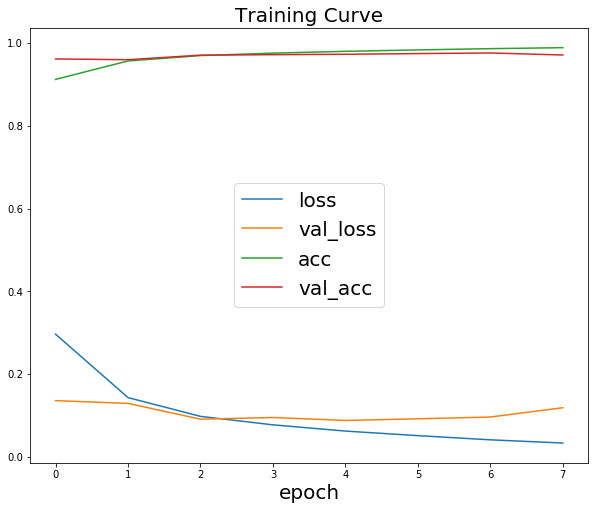

In [19]:
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.plot(hist.history['acc']) 
plt.plot(hist.history['val_acc']) 
plt.title('Training Curve',fontsize=20)  
#plt.ylabel('loss')  
plt.xlabel('epoch',fontsize=20)  
plt.legend(['loss','val_loss', 'acc','val_acc'], loc='center', fontsize=20)  
plt.show()

In [20]:
print (hist.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [21]:
# Check which items we got right / wrong
correct_indices = np.nonzero(result == y0_test)[0]
incorrect_indices = np.nonzero(result != y0_test)[0]
print(np.array(incorrect_indices).ndim)
print(incorrect_indices) ##incorrect_indices,correct_indices are 2 arrays
N_incorrect=np.array(incorrect_indices).size
print(N_incorrect)

1
[ 115  119  149  247  266  321  340  445  502  545  582  583  610  619  645
  659  674  684  707  717  720  740  810  813  839  846  881  900  947  951
  956  959  965 1003 1014 1032 1039 1082 1112 1156 1178 1194 1226 1232 1242
 1247 1319 1328 1356 1393 1395 1444 1476 1500 1522 1527 1549 1554 1587 1609
 1618 1637 1678 1681 1709 1717 1790 1813 1901 1941 1984 1987 2004 2016 2018
 2024 2035 2043 2044 2053 2067 2093 2109 2118 2135 2182 2186 2189 2266 2280
 2293 2299 2333 2369 2406 2455 2488 2525 2573 2597 2607 2654 2705 2713 2720
 2730 2751 2758 2810 2877 2896 2915 2921 2939 2953 2995 3030 3073 3117 3266
 3375 3422 3451 3457 3475 3490 3503 3520 3549 3558 3567 3597 3629 3664 3674
 3681 3702 3727 3751 3780 3808 3838 3853 3869 3893 3902 3906 3941 4065 4078
 4094 4100 4116 4142 4154 4199 4201 4212 4224 4248 4271 4289 4294 4355 4360
 4437 4497 4504 4505 4534 4536 4761 4807 4823 4876 4880 4888 4890 4966 4990
 5078 5140 5165 5199 5331 5457 5547 5593 5594 5600 5634 5642 5655 5676 5731
 5734 5749

Prediction: 4 
 Answer: 4 
 Index: [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


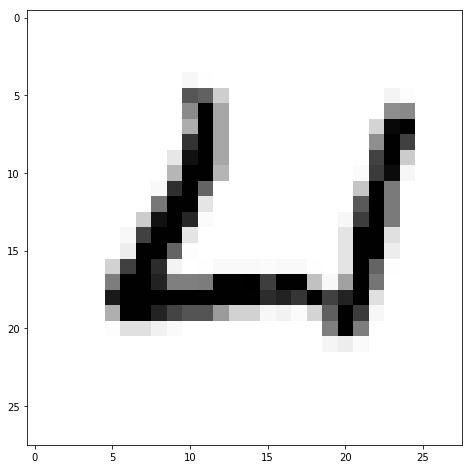

In [22]:
wrong=33
print("Prediction:",result[wrong],"\n","Answer:",y0_test[wrong],"\n","Index:",y_test[wrong])
plt.imshow(x0_test[wrong], cmap='Greys')

In [23]:
pick = np.random.randint(1,10,25)

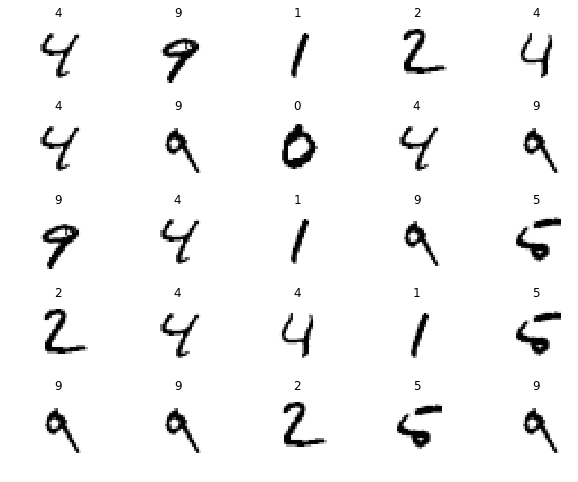

In [24]:
plt.subplots_adjust(wspace=0.5, hspace=0.5) #call matplot
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.title(result[pick[i]])
    plt.imshow(x0_test[pick[i]], cmap='Greys')
    plt.axis("off")

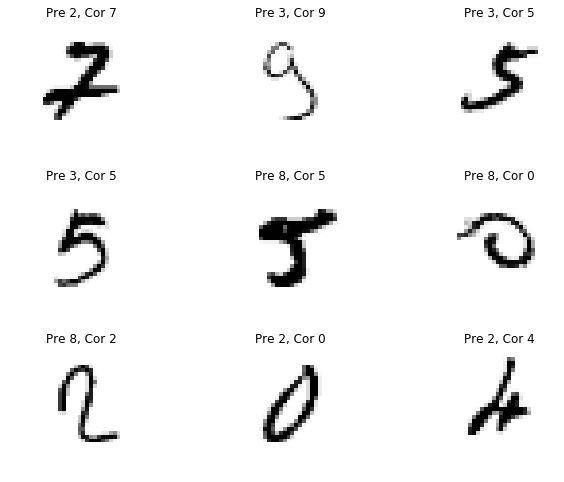

In [25]:
pick1 = np.random.randint(0,N_incorrect,9)
plt.subplots_adjust(wspace=0.5, hspace=0.5) #call matplot

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x0_test[incorrect_indices[pick1[i]]], cmap='Greys', interpolation='none')
    plt.title("Pre {}, Cor {}".format(result[incorrect_indices[pick1[i]]], y0_test[incorrect_indices[pick1[i]]])) #Predict, Correct
    #plt.title(y0_test[pick[i]]result[pick1[i]])
    plt.axis("off")